# Visualization 2D Classifier

In [1]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random

In [ ]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=40, centers=2, n_features=2)

# scatter plot, dots colored by class value
# Assign weight from X indices 0
# Assign smell from X indices 1
# Assign label from y
df = pd.DataFrame(dict(weight=X[:,0], smell=X[:,1], label=y))

colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='weight', y='smell', label=key, color=colors[key])
pyplot.show()

# Perceptron

In [ ]:
X = np.array([
    [-2,4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

In [ ]:
def print_graph(w):
    pyplot.scatter(X[:2,0],X[:2,1], s=120, marker='_', linewidths=2, color='red')
    pyplot.scatter(X[2:,0],X[2:,1], s=120, marker='_', linewidths=2, color='blue')

    # Print the hyperplane calculated by perceptron_sgd()
    x2=[w[0],w[1],-w[1],w[0]]
    x3=[w[0],w[1],w[1],-w[0]]

    x2x3 =np.array([x2,x3])
    X1,Y1,U,V = zip(*x2x3)
    ax = pyplot.gca()

    ax.quiver(X1,Y1,U,V,scale=1, color='green')

In [ ]:
def perceptron_sgd_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.
    
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    wArray = []
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
                wArray.append(w)
                print('weight: {0}'.format(w))
        errors.append(total_error*-1)
    
    
#     pyplot.plot(errors)
#     pyplot.xlabel('Epoch')
#     pyplot.ylabel('Total Loss')
    
    return wArray

In [ ]:
wArray = perceptron_sgd_plot(X,y)

In [ ]:
colors = ['b', 'c']
colors = ['b', 'c']

pyplot.scatter(X[:2,0],X[:2,1], s=120, marker='_', linewidths=2, color='red')
pyplot.scatter(X[2:,0],X[2:,1], s=120, marker='_', linewidths=2, color='blue')


In [ ]:
print_graph(wArray[0])

# Visualization Unsupervised

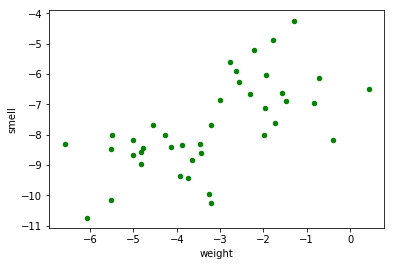

In [2]:
# generate 2d classification dataset
X, y= make_blobs(n_samples=40, centers=2, n_features=2)

# scatter plot, dots colored by class value
# Assign weight from X indices 0
# Assign smell from X indices 1
df = pd.DataFrame(dict(weight=X[:,0], smell=X[:,1]))

colors = {0:'green'}
fig, ax = pyplot.subplots()

df.plot(ax=ax, kind='scatter', x='weight', y='smell', color='green')

pyplot.show()

In [3]:
max_clusters = 2

In [4]:
centroid_list = []
cols = ['weight','smell']
for i in range(max_clusters):
 
    OneDict = {}
    randomIndex = random.randrange(0, df.shape[0])
    for col in cols:
        OneDict[col] = df.iloc[randomIndex][col]
        centroid_list.append(OneDict)

In [5]:
max_iter =  7
iters =  0
cluster_train = []

while iters < max_iter:
    for i in range(df.shape[0]): 
        # step 1 begins:
        cluster_index =  0
        mini = 9999
        for centroid in centroid_list:
            dist = np.linalg.norm( centroid.values() -             
                                        df[cols].iloc[i])
            if dist < mini:
                mini = dist 
                cluster_train[i] = cluster_index
                cluster_index += 1
   

IndexError: list assignment index out of range